In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


* No null values are there
* Data was scaled and then pca was done on all features except time and amount

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [3]:
df=pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# This shows that our dataset is very imbalanced
print('Normal {}%'.format(round( (df['Class'].value_counts()[0]/len(df))*100,2 )))
print('Fraud {}%'.format(round( (df['Class'].value_counts()[1]/len(df))*100,2 )))

Normal 99.83%
Fraud 0.17%


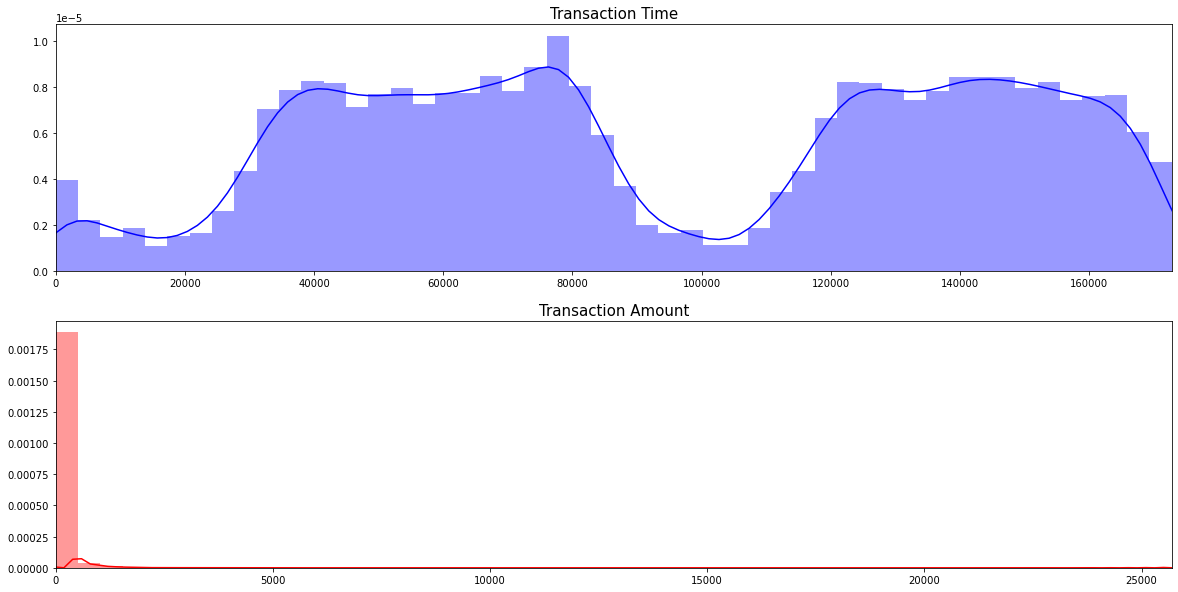

In [7]:
fig, ax = plt.subplots(2, 1, figsize=(20,10))

amount = df['Amount'].values
time = df['Time'].values

sns.distplot(time, ax=ax[0], color='b')
ax[0].set_title('Transaction Time', fontsize=15)
ax[0].set_xlim([min(time), max(time)])

sns.distplot(amount, ax=ax[1], color='r')
ax[1].set_title('Transaction Amount', fontsize=15)
ax[1].set_xlim([min(amount), max(amount)])

plt.show()


* As the dataset is imbalanced we need to make subsample for better training
* Also the scaling of time and amount features needs to be done

In [8]:
# Scaling 
from sklearn.preprocessing import RobustScaler

rob=RobustScaler() # better if outliers are present than standard scaler

df['amount_scaled']=rob.fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled']=rob.fit_transform(df['Time'].values.reshape(-1,1))

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,amount_scaled,time_scaled
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274,-0.994983
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825,-0.994983
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721,-0.994972
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291,-0.994972
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579,-0.994960


In [9]:
df['Time']=df['time_scaled']
df['Amount']=df['amount_scaled']

df.drop(['time_scaled','amount_scaled'],axis=1,inplace=True)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [10]:
#StratifiedShuffleSplit creates splits by preserving the same percentage for each target class as in the complete set.
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

X=df.drop('Class',axis=1)
y=df['Class']

In [11]:
# Shuffling the data
df=df.sample(frac=1)

fraud=df.loc[df['Class']==1]
non_fraud=df.loc[df['Class']==0][:492] #Equal quantity of fraud and non fraud

equal_df=pd.concat([fraud,non_fraud])

df_n=equal_df.sample(frac=1,random_state=5)
df_n.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
7341,-0.879122,1.181707,0.549269,0.793039,2.576736,0.233293,0.659857,-0.215042,0.078787,0.701582,...,-0.438325,-0.893837,-0.020980,-0.571870,0.456783,-0.186091,-0.017306,0.002174,-0.307413,0
197285,0.555082,2.049062,-1.168046,-0.821199,-0.875010,-0.850838,-0.380614,-0.797046,-0.206199,-0.008563,...,0.340150,0.941105,-0.048245,-0.639556,-0.040200,-0.056596,0.001261,-0.037712,1.075945,0
261666,0.886277,-3.710017,3.869392,-0.757894,-0.805064,-0.811048,0.606359,-2.792584,-11.217630,0.949629,...,10.479346,-4.039858,1.820515,0.727157,-0.265848,0.172416,0.826754,0.286456,-0.230699,0
225671,0.700819,2.063272,-0.043923,-1.059015,0.417445,-0.143324,-1.218268,0.187017,-0.338051,0.533910,...,-0.288629,-0.693180,0.341464,0.047554,-0.297690,0.195311,-0.070262,-0.059886,-0.293579,0
191074,0.521658,-1.836940,-1.646764,-3.381168,0.473354,0.074243,-0.446751,3.791907,-1.351045,0.095186,...,0.010663,1.786681,-0.151178,-0.582098,-0.956062,-0.334369,0.715600,0.370450,9.764550,1


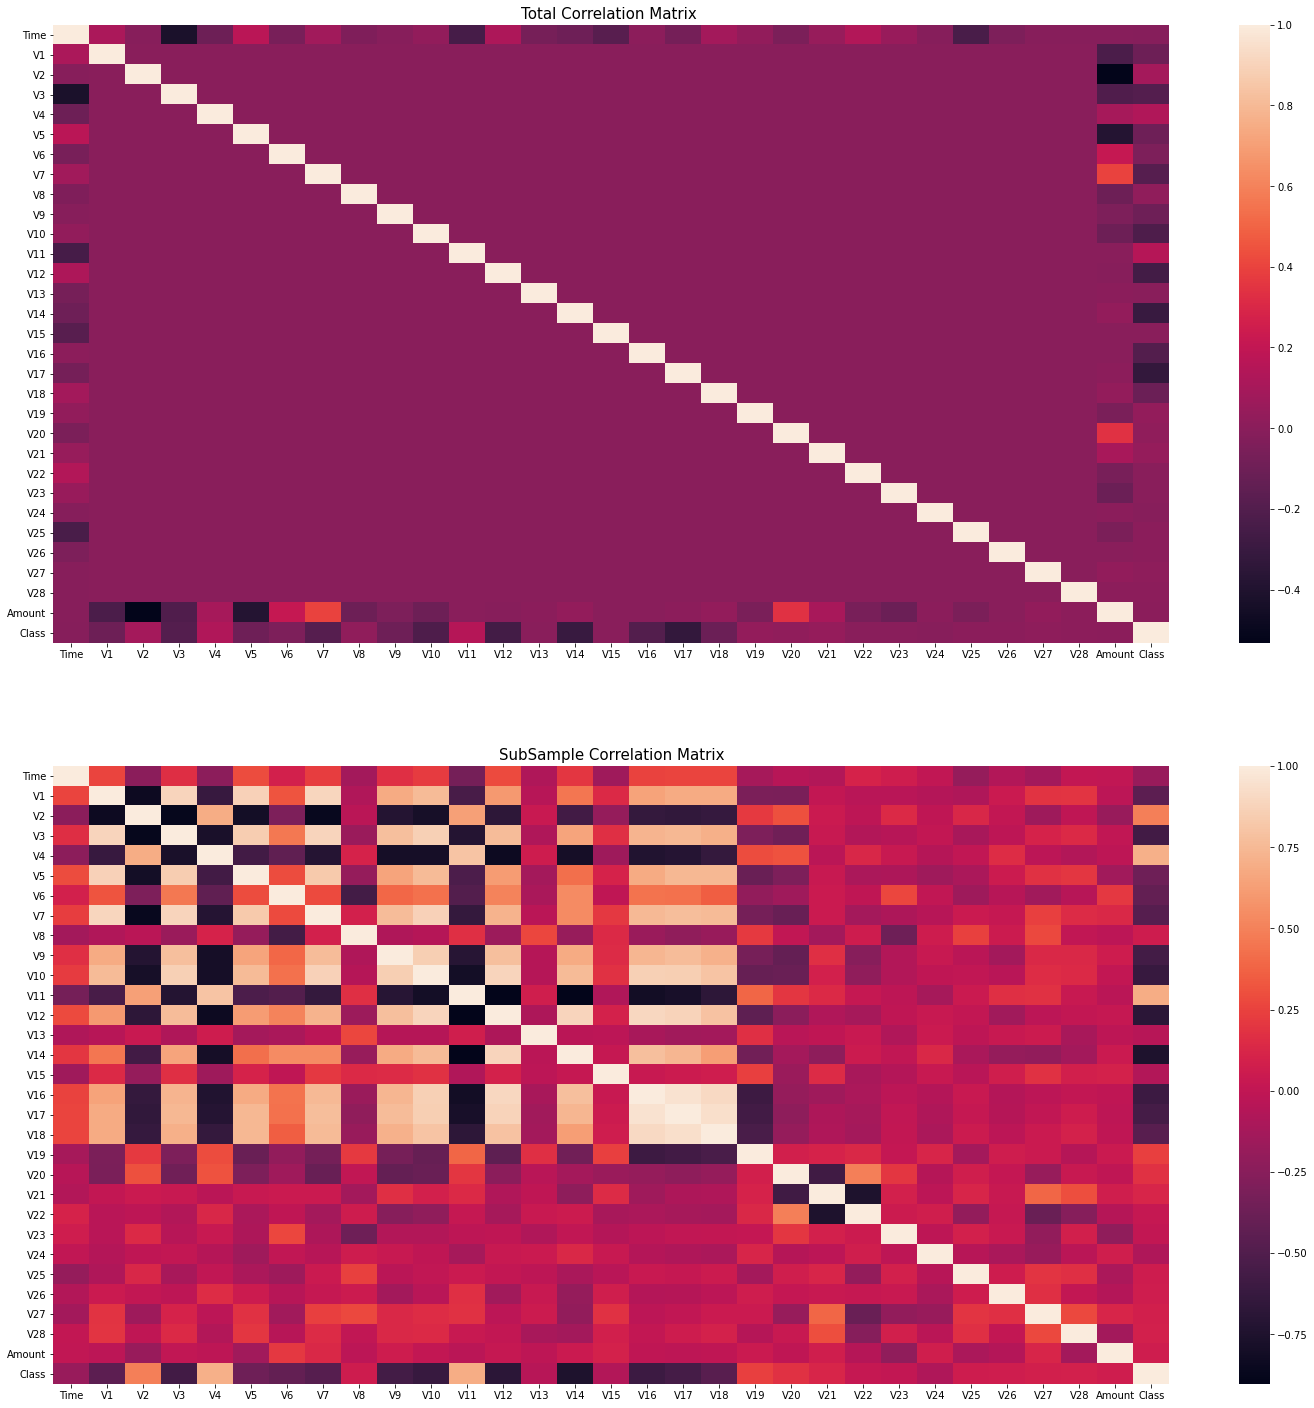

In [12]:
f, ax = plt.subplots(2, 1, figsize=(25,25))

corr = df.corr()
sns.heatmap(corr, annot_kws={'size':20}, ax=ax[0])
ax[0].set_title("Total Correlation Matrix ", fontsize=15)


sub_sample_corr = df_n.corr()
sns.heatmap(sub_sample_corr, annot_kws={'size':20}, ax=ax[1])
ax[1].set_title('SubSample Correlation Matrix', fontsize=15)
plt.show()

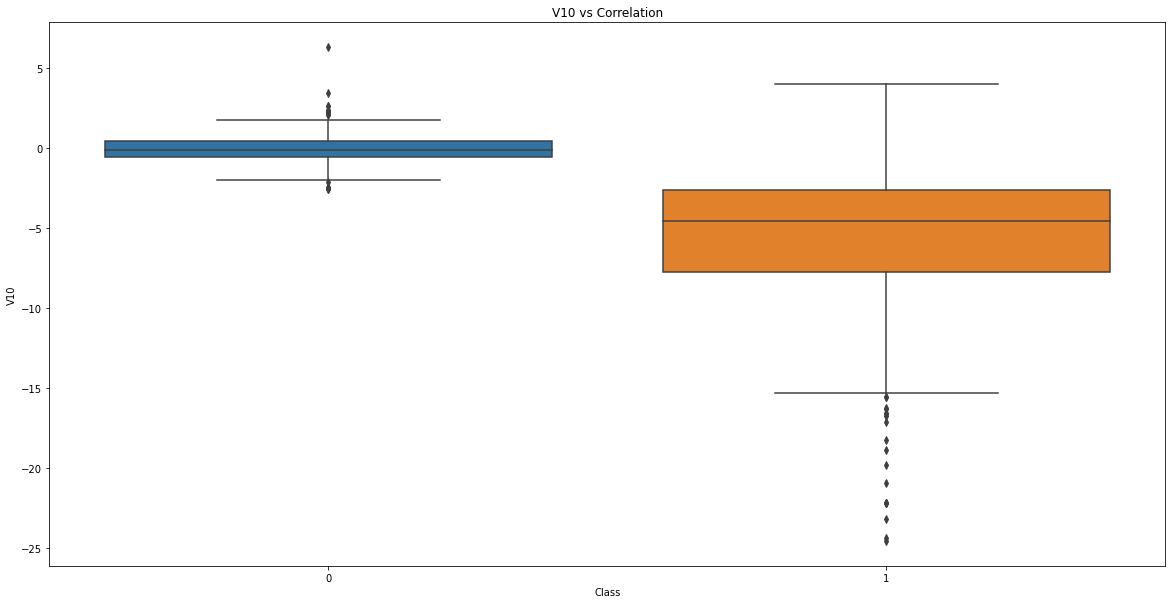

In [13]:
fig,ax=plt.subplots(1,1,figsize=(20,10))
sns.boxplot(x="Class", y="V10", data=df_n,ax=ax)
ax.set_title('V10 vs Correlation')

plt.show()

* From above visualization we can clearly see the outliers
* We need to remove outliers for better model

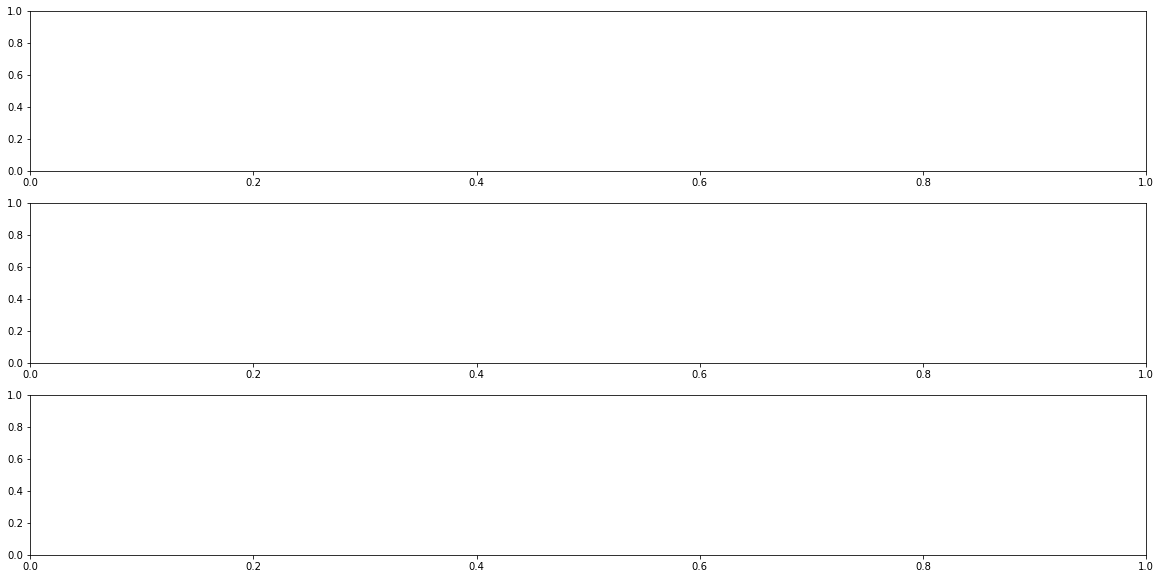

In [14]:
# Removing outliers
from scipy.stats import norm
f, ax = plt.subplots(3,1,figsize=(20,10))




In [15]:
# Detection of outliers
# Used the Tukey method (Tukey JW., 1977) for finding outliers
# Removing the rows which have more than n outliers
# of different features
def outliers(df,n,columns): # dataframe, accepted outliers
    outliers_list = []
    for col in columns:
        q1 = np.percentile(df[col],25) #1st quartile
        q2 = np.percentile(df[col],75) #2nd quartile
        R = q2-q1 #inter quartile range
        OR = 1.5*R #outlier range
        outliers_col = df[ (df[col]<(q1-OR)) | (df[col]>(q2+OR)) ].index
        outliers_list.extend(outliers_col)
    
    outliers_list = Counter(outliers_list)
    outliers_list= list(i for i,j in outliers_list.items() if j>n)
    return outliers_list

In [16]:
# Detecting outliers using the function
Outliers = outliers(df_n,1,['V10','V12','V14'])
len(Outliers)

36

In [17]:
df_nn=df_n.drop(Outliers,0)
df_nn.shape

(948, 31)

# **Using t-SNE algorithm for clustering**
* t-SNE algorithm is quite accurate for small as well as large datasets

In [18]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches

In [19]:
X = df_n.drop('Class', axis=1)
y = df_n['Class']

In [20]:
X_tsne=TSNE(n_components=2,random_state=5).fit_transform(X.values)

X_pca=PCA(n_components=2,random_state=5).fit_transform(X.values)

X_svd=TruncatedSVD(n_components=2,algorithm='randomized',random_state=5).fit_transform(X.values)

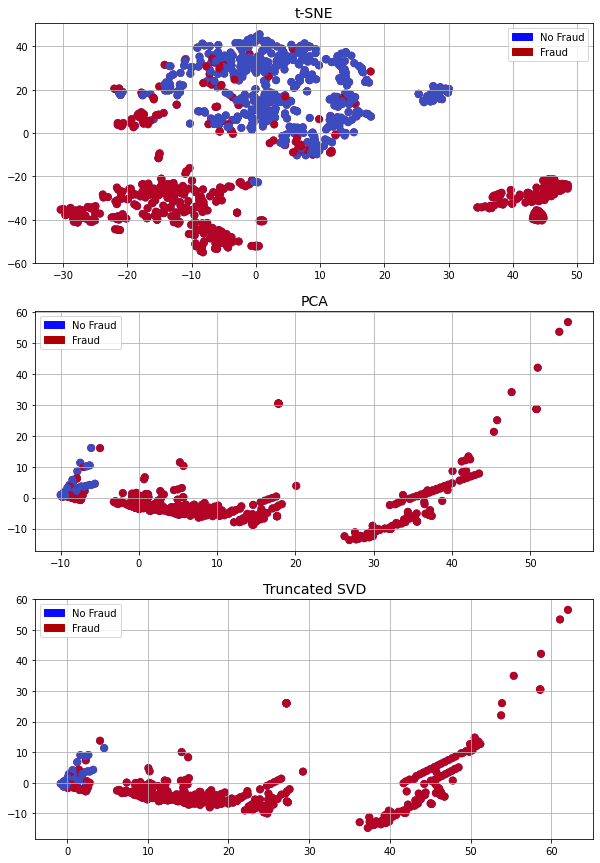

In [21]:
f, ax = plt.subplots(3,1,figsize=(10,15))
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

# t-SNE
ax[0].scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[0].scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax[0].set_title('t-SNE', fontsize=14)
ax[0].grid(True)
ax[0].legend(handles=[blue_patch, red_patch])

#PCA
ax[1].scatter(X_pca[:,0], X_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[1].scatter(X_pca[:,0], X_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax[1].set_title('PCA', fontsize=14)
ax[1].grid(True)
ax[1].legend(handles=[blue_patch, red_patch])

#SVD
ax[2].scatter(X_svd[:,0], X_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax[2].scatter(X_svd[:,0], X_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax[2].set_title('Truncated SVD', fontsize=14)
ax[2].grid(True)
ax[2].legend(handles=[blue_patch, red_patch])


plt.show()

**Using different Classifiers**

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [23]:
# conversion to arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Using different classifiers
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier()
}

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [27]:
for key,classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    training_score=cross_val_score(classifier,X_train,y_train,cv=5) # stratified 5 fold,if none then 5 fold
    print(classifier,"->",round(training_score.mean(),2),"% training accuracy")

LogisticRegression() -> 0.94 % training accuracy
KNeighborsClassifier() -> 0.93 % training accuracy
SVC() -> 0.93 % training accuracy
DecisionTreeClassifier() -> 0.9 % training accuracy
RandomForestClassifier() -> 0.94 % training accuracy


In [28]:
# Logistic regression
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# K nearest
knear_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_knear = GridSearchCV(KNeighborsClassifier(), knear_params)
grid_knear.fit(X_train, y_train)
knear_neighbors = grid_knear.best_estimator_

# Support vector
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# Decision tree 
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [30]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knear_score = cross_val_score(knear_neighbors, X_train, y_train, cv=5)
print('Knearest Neighbors Cross Validation Score', round(knear_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('Decision Tree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  94.54%
Knearest Neighbors Cross Validation Score 93.01%
Support Vector Classifier Cross Validation Score 93.4%
Decision Tree Classifier Cross Validation Score 92.12%


In [31]:
from sklearn.model_selection import StratifiedKFold

In [32]:
# For undersampling while training
skf=StratifiedKFold(n_splits=5)

for train_i,test_i in skf.split(X,y):
    X_train_u,X_test_u=X.iloc[train_i],X.iloc[test_i]
    y_train_u,y_test_u=y.iloc[train_i],y.iloc[test_i]
    
X_train_u=X_train_u.values
X_test_u=X_test_u.values
y_train_u=y_train_u.values
y_test_u=y_test_u.values 

accuracy_u = []
precision_u = []
recall_u = []
f1_u = []
auc_u = []

In [33]:
from imblearn.under_sampling import NearMiss 
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

In [34]:
for train,test in skf.split(X, y):
    X_train_in, X_test_in = X.iloc[train], X.iloc[test]
    y_train_in, y_test_in = y.iloc[train], y.iloc[test]

X_train_in = X_train_in.values
X_test_in = X_test_in.values
y_train_in = y_train_in.values
y_test_in = y_test_in.values

In [35]:
# Implementation of near miss technique
X_miss,Y_miss=NearMiss().fit_sample(X.values,y.values)
for train, test in skf.split(X_train_u,y_train_u):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg)
    undersample_model = undersample_pipeline.fit(X_train_u[train],y_train_u[train])
    undersample_prediction = undersample_model.predict(X_train_u[test])
    
    accuracy_u.append(undersample_pipeline.score(X_train_in[test],y_train_in[test]))
    precision_u.append(precision_score(y_train_in[test], undersample_prediction))
    recall_u.append(recall_score(y_train_in[test], undersample_prediction))
    f1_u.append(f1_score(y_train_in[test], undersample_prediction))
    auc_u.append(roc_auc_score(y_train_u[test], undersample_prediction))

* Learning Curves

In [36]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [37]:
def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14))
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knearest Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

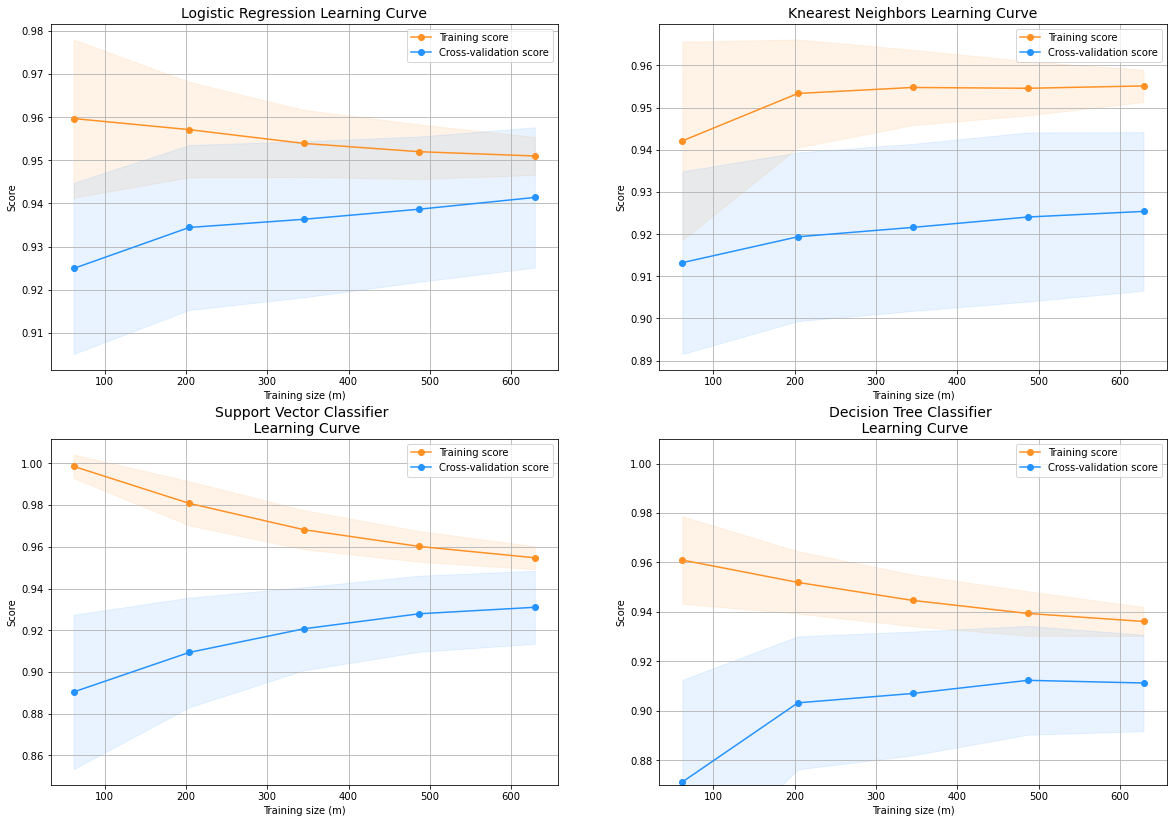

In [38]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=5)
plot_learning_curve(log_reg, knear_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv)

In [39]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

In [40]:
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,method="decision_function")
knear_pred = cross_val_predict(knear_neighbors, X_train, y_train, cv=5)
svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,method="decision_function")
tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knear_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9788808804154072
KNears Neighbors:  0.9298451264563796
Support Vector Classifier:  0.974896019013666
Decision Tree Classifier:  0.923467410679687


* SMOTE Technique

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [42]:
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

log_reg_sm = LogisticRegression()
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=50)

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in skf.split(X_train_in,y_train_in):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    model = pipeline.fit(X_train_in[train],y_train_in[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(X_train_in[test])
    
    accuracy_lst.append(pipeline.score(X_train_in[test],y_train_in[test]))
    precision_lst.append(precision_score(y_train_in[test], prediction))
    recall_lst.append(recall_score(y_train_in[test], prediction))
    f1_lst.append(f1_score(y_train_in[test], prediction))
    auc_lst.append(roc_auc_score(y_train_in[test], prediction))


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 14 is smaller than n_iter=50. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penal

In [43]:
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("f1: {}".format(np.mean(f1_lst)))

accuracy: 0.9429331613319357
recall: 0.9112625770853621
precision: 0.9733544137022399
f1: 0.9408015436250731


In [44]:
from sklearn.metrics import accuracy_score

In [45]:
# Final Score

# Logistic Regression->Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)

# Logistic Regression->SMOTE
y_pred_sm = best_est.predict(X_test_in)
oversample_score = accuracy_score(y_test_in, y_pred_sm)

print('Undersample Score -> ',undersample_score)
print('Oversample Score -> ',oversample_score)

Undersample Score ->  0.949238578680203
Oversample Score ->  0.9336734693877551
